# Observando relaciones entre variables de Producción Agrícola (SIAP) y Precios de mercado (SNIIM)

### Librerías

In [82]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de datos

In [83]:
directory = '../limpieza'

df_excedente_agricola = pd.read_csv(os.path.join(directory,"excedente_agrícola.csv"))
df_excedente_agricola

,Año,Mes,Cultivo,Estado,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha),Precio,...,Temp_2_Metros_MAX,Temp_2_Metros_MIN,Temp_2_Metros_Pto_Congelación,Temp_2_Metros_Pto_Húmedo,Presión_Superficial,Velocidad_Viento,Humedad_Relativa,Precipitacion,Precipitación,Ivf
0,2020,1,Berenjena,Nayarit,60.00,0.00,0.0,0.00,0.000000,26.545455,...,26.256194,14.834145,11.615113,15.705790,92.821242,1.488903,63.214177,2.056097,60.4,763.0
1,2020,1,Berenjena,Yucatán,28.46,0.00,0.0,0.00,0.000000,5.830000,...,30.368262,19.961978,18.301996,21.435265,101.449988,0.637279,70.907876,0.629178,29.5,763.0
2,2020,1,Brócoli,Aguascalientes,440.00,0.00,0.0,0.00,0.000000,12.181818,...,19.955865,4.849208,2.336100,6.980059,79.269296,2.306334,59.219238,0.836100,38.5,138.1
3,2020,1,Brócoli,Baja California,886.46,815.81,0.0,12273.01,15.043956,26.710000,...,19.138839,7.561161,3.232000,7.694516,96.414323,2.328968,60.059871,0.225097,4.3,138.1
4,2020,1,Brócoli,Baja California Sur,1.90,0.00,0.0,0.00,0.000000,26.000000,...,24.043097,13.045290,10.594581,14.085290,99.619742,2.680968,67.542323,0.050258,1.9,138.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19166,2023,9,Uva,Nuevo León,0.00,2.00,0.0,3.40,2.680328,53.171905,...,36.248425,21.922235,16.700967,22.653732,93.270902,2.417856,54.130216,0.892020,NaN,NaN
19167,2023,9,Uva,San Luis Potosí,0.00,0.00,0.0,0.00,8.100000,76.702381,...,33.256092,18.804046,14.938057,20.087397,88.223787,2.248138,58.956276,0.720333,NaN,NaN
19168,2023,9,Uva,Sonora,0.00,0.00,0.0,0.00,16.439033,51.404762,...,36.176991,21.756361,13.314583,20.814866,92.372620,1.917005,44.605347,0.924306,NaN,NaN
19169,2023,9,Uva,Zacatecas,0.00,1439.50,0.0,24727.96,11.991831,67.142857,...,29.220511,14.137678,10.953649,16.114023,80.179500,1.957529,58.186540,0.953316,NaN,NaN


### Correlación de variables

En la matriz de correlación realizada en el EDA automatizado se observó que había muy poca relación entre variables.

Ese análisis trata de encontrar relaciones entre las variables, sin embargo, si hacemos un análisis general no se encuentran relaciones significativas ya que la información es diferente para cada cultivo y para cada estado. Es decir, no se puede esperar que los datos de producción agrícola del Chile verde sean los mismos que el Mango, por poner un ejemplo. Tampoco puden ser iguales a nivel estado, ya que cada estado tiene diferentes condiciones climáticas, etc.

Por eso se hace el siguiente análisis donde se agrupa por cultivo y por estado, para intentar ver relaciones por ejemplo entre las variables de producción agrícola y el precio del Chile verde en Sonora para 2020-2023.

Aquí se puede observar que cuando la **Superficie Cosechada es 0, el precio aumenta**:

In [84]:
df_chile_sonora = df_excedente_agricola[(df_excedente_agricola['Cultivo']=="Chile verde") & (df_excedente_agricola['Estado']=="Sonora")]
df_chile_sonora

,Año,Mes,Cultivo,Estado,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha),Precio,...,Temp_2_Metros_MAX,Temp_2_Metros_MIN,Temp_2_Metros_Pto_Congelación,Temp_2_Metros_Pto_Húmedo,Presión_Superficial,Velocidad_Viento,Humedad_Relativa,Precipitacion,Precipitación,Ivf
59,2020,1,Chile verde,Sonora,2262.77,172.00,0.0,2660.00,15.465116,36.400350,...,20.623387,6.623114,3.092428,7.845376,92.672289,1.881886,56.600099,0.305551,9.2,132.8
459,2020,2,Chile verde,Sonora,273.00,605.10,3.0,17593.83,26.063351,35.504049,...,21.385498,6.977112,1.643875,7.502146,92.576983,2.306691,50.624612,0.790556,25.6,138.3
861,2020,3,Chile verde,Sonora,497.00,788.80,0.0,28720.21,31.275330,37.005495,...,22.609547,9.358571,4.991053,10.158795,92.581281,2.240157,55.669207,2.424512,82.1,112.4
1275,2020,4,Chile verde,Sonora,100.00,644.50,0.0,36575.11,38.703018,39.129555,...,28.279231,12.207681,3.999241,11.895366,92.420426,2.360167,41.239833,0.075699,2.5,104.1
1712,2020,5,Chile verde,Sonora,765.10,527.70,0.0,20431.51,38.705913,38.024887,...,34.360556,17.310309,4.130614,14.876832,92.313181,2.509252,29.653177,0.286313,7.3,111.7
2156,2020,7,Chile verde,Sonora,89.50,239.74,0.0,13902.30,44.126424,45.657143,...,36.003651,23.546322,17.082348,23.269651,92.361366,2.055802,51.870914,2.714991,93.5,111.5
2475,2020,8,Chile verde,Sonora,547.00,0.00,0.0,50.00,44.139476,43.696981,...,36.680000,23.925475,17.827823,23.842200,92.307478,1.818562,53.522272,2.364346,74.8,204.3
2890,2020,9,Chile verde,Sonora,394.00,20.20,0.0,344.00,43.997273,38.993077,...,35.851852,21.502037,12.729273,20.371796,92.377699,1.980796,44.717477,0.554125,17.8,195.6
3291,2020,10,Chile verde,Sonora,1377.00,0.00,0.0,0.00,0.000000,41.895594,...,33.612867,17.357782,3.239113,13.946138,92.392375,1.976806,29.875206,0.010358,0.2,200.3
3601,2020,11,Chile verde,Sonora,673.00,0.00,0.0,0.00,0.000000,41.434251,...,28.411088,13.032120,-0.151185,9.669889,92.539657,2.120431,31.006532,0.069093,1.8,258.5


<Axes: xlabel='Superficie(ha)_Cosechada', ylabel='Precio'>

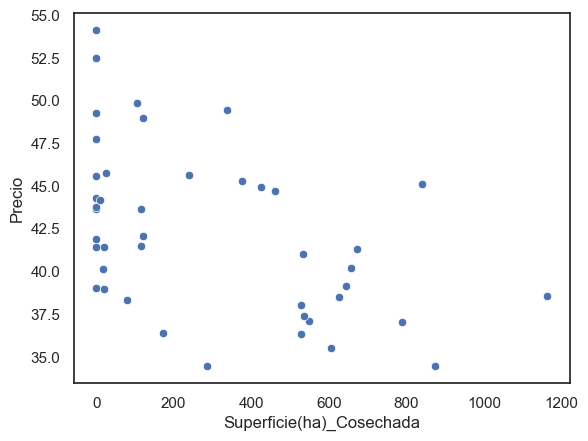

In [85]:
sns.scatterplot(data=df_chile_sonora, x="Superficie(ha)_Cosechada", y="Precio")

Por lo tanto **existe una correlación negativa** entre lo cosechado y el precio:

In [86]:
# El precio sube cuando no hay cosecha
df_chile_sonora['Superficie(ha)_Cosechada'].corr(df_chile_sonora['Precio'])

-0.4802698426609557

Lo mismo podemos obervar entre la producción y el precio:

In [87]:
# El precio sube cuando la producción baja
df_chile_sonora['Producción'].corr(df_chile_sonora['Precio'])

-0.434057415277152

De esta manera, podemos calcular la **correlación entre la Superficie Cosechada y el Precio** de cada cultivo para cada estado:

In [88]:
# Correlación entre Superficie Cosechada y Precio, por Estado y por Cultivo
df_corr_cosechado_precio = df_excedente_agricola.groupby(['Estado','Cultivo'])[['Superficie(ha)_Cosechada','Precio']]\
    .corr()\
    .unstack()\
    .iloc[:,1]\
    .reset_index()


df_corr_cosechado_precio.columns = df_corr_cosechado_precio.columns.droplevel(1)
df_corr_cosechado_precio.rename(columns={"Superficie(ha)_Cosechada": "Corr_Superficie_Cosechada_Precio"}, inplace=True)
df_corr_cosechado_precio

,Estado,Cultivo,Corr_Superficie_Cosechada_Precio
0,Aguascalientes,Brócoli,0.029149
1,Aguascalientes,Calabacita,-0.191237
2,Aguascalientes,Cebolla,-0.187012
3,Aguascalientes,Chile verde,-0.092691
4,Aguascalientes,Coliflor,0.193779
...,...,...,...
546,Zacatecas,Pera,NaN
547,Zacatecas,Sandía,-0.129471
548,Zacatecas,Tomate rojo,0.051582
549,Zacatecas,Tomate verde,-0.091834


[Text(0.5, 110.24999999999996, 'Estado'), Text(154.75, 0.5, 'Cultivo')]

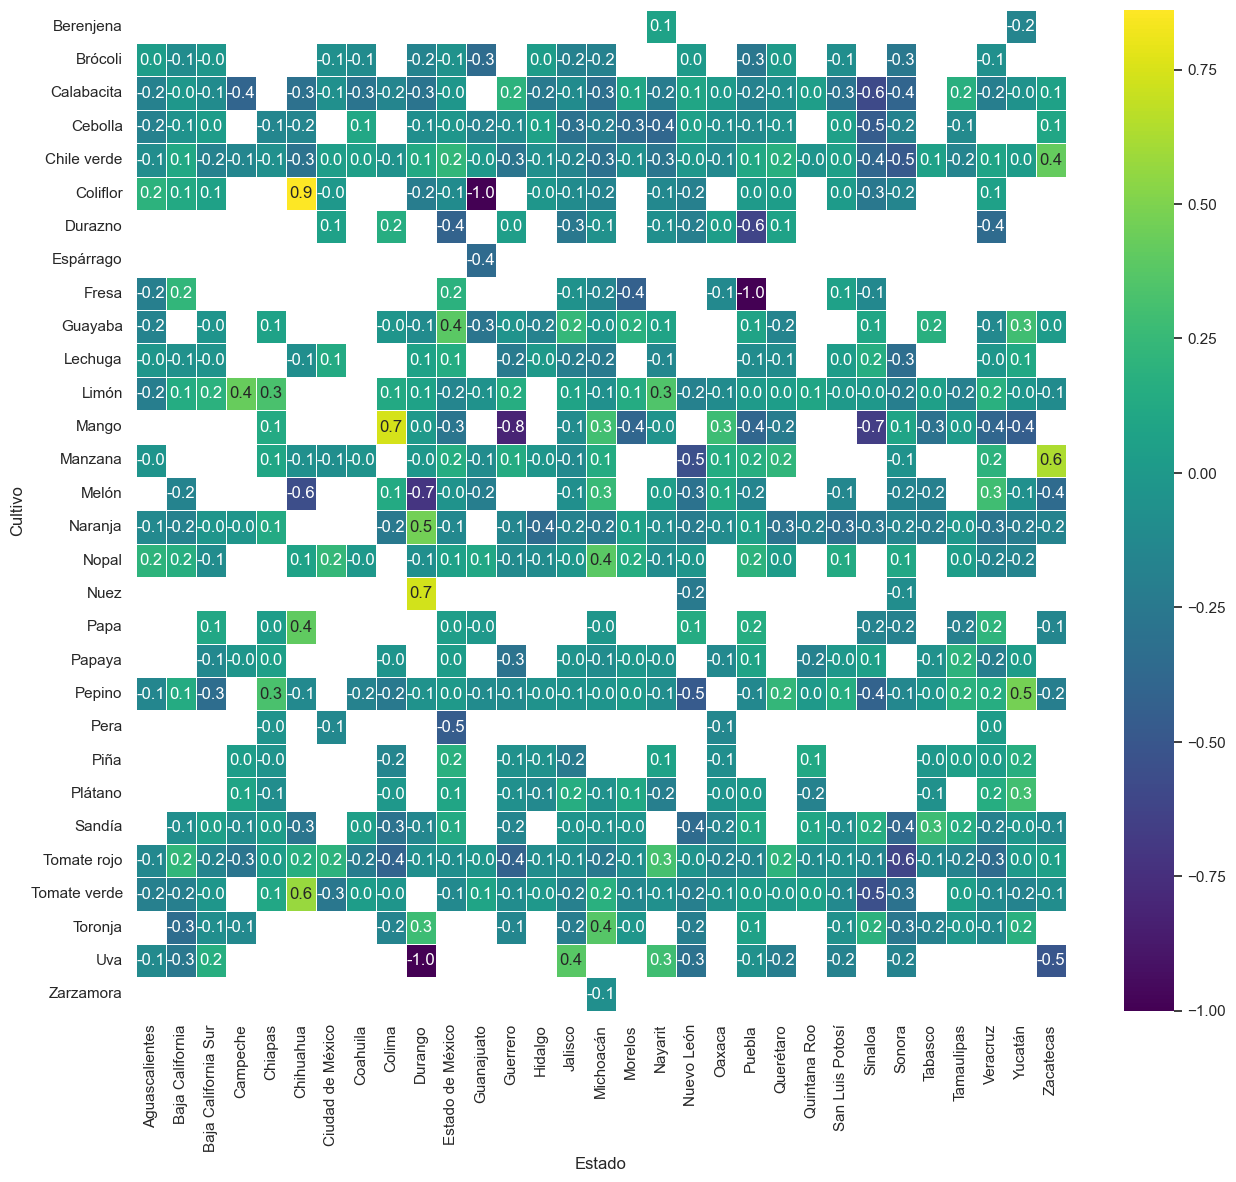

In [89]:
df_corr_cosechado_precio_pivot = df_corr_cosechado_precio.pivot(index="Cultivo", columns="Estado", values="Corr_Superficie_Cosechada_Precio")

sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(15, 13))
ax = sns.heatmap(data=df_corr_cosechado_precio_pivot, annot=True, fmt=".1f", linewidth=.5, cmap="viridis")
ax.set(xlabel="Estado", ylabel="Cultivo")

Encontrando que las siguientes tuplas de cultivo y estado, serían las más relacionadas en cuanto a la Superficie Cosechada y el Precio: 

In [90]:
df_corr_cosechado_precio[df_corr_cosechado_precio['Corr_Superficie_Cosechada_Precio']<-0.7]

,Estado,Cultivo,Corr_Superficie_Cosechada_Precio
144,Durango,Melón,-0.714494
154,Durango,Uva,-1.000000
182,Guanajuato,Coliflor,-1.000000
200,Guerrero,Mango,-0.812119
361,Puebla,Fresa,-1.000000


Lo mismo podemos analizar para las variables de Superficie Sembrada, Superficie Siniestrada y Producción con el Precio:

In [91]:
df_corr_sembrado_precio = df_excedente_agricola.groupby(['Estado','Cultivo'])[['Superficie(ha)_Sembrada','Precio']]\
    .corr()\
    .unstack()\
    .iloc[:,1]\
    .reset_index()



df_corr_sembrado_precio.columns = df_corr_sembrado_precio.columns.droplevel(1)
df_corr_sembrado_precio.rename(columns={"Superficie(ha)_Sembrada": "Corr_Superficie_Sembrada_Precio"}, inplace=True)
df_corr_sembrado_precio

,Estado,Cultivo,Corr_Superficie_Sembrada_Precio
0,Aguascalientes,Brócoli,0.120720
1,Aguascalientes,Calabacita,0.155395
2,Aguascalientes,Cebolla,-0.069997
3,Aguascalientes,Chile verde,-0.194106
4,Aguascalientes,Coliflor,0.018298
...,...,...,...
546,Zacatecas,Pera,NaN
547,Zacatecas,Sandía,-0.051293
548,Zacatecas,Tomate rojo,-0.022892
549,Zacatecas,Tomate verde,-0.166298


[Text(0.5, 110.24999999999996, 'Estado'), Text(154.75, 0.5, 'Cultivo')]

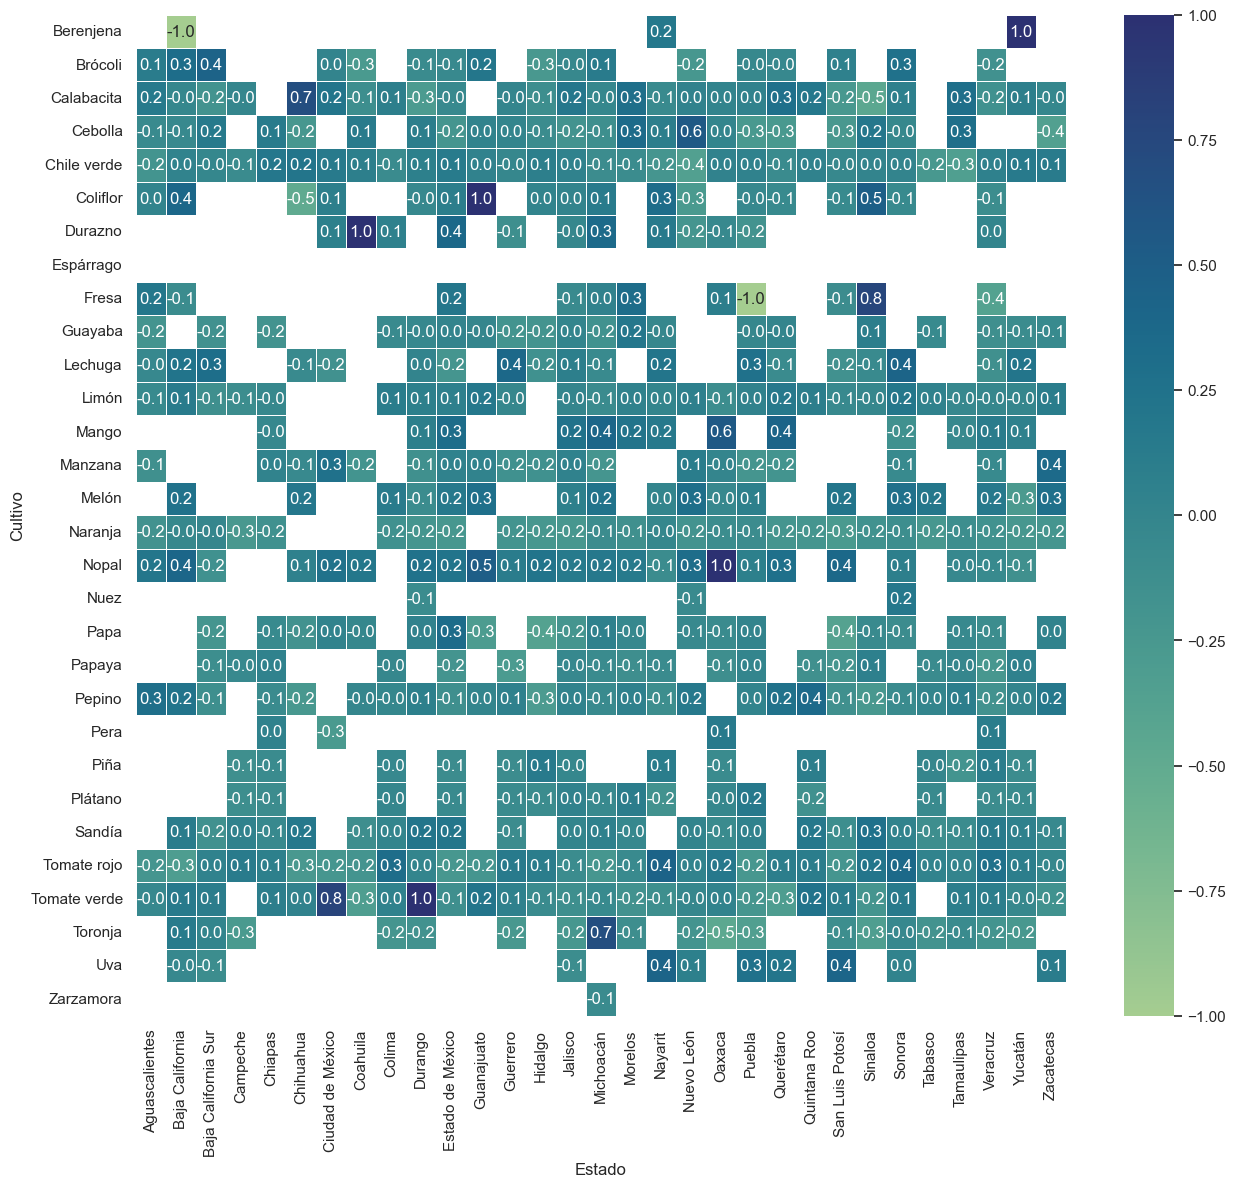

In [92]:
df_corr_sembrado_precio_pivot = df_corr_sembrado_precio.pivot(index="Cultivo", columns="Estado", values="Corr_Superficie_Sembrada_Precio")

f, ax = plt.subplots(figsize=(15, 13))
ax = sns.heatmap(data=df_corr_sembrado_precio_pivot, annot=True, fmt=".1f", linewidth=.5, cmap="crest")
ax.set(xlabel="Estado", ylabel="Cultivo")

In [93]:
df_corr_siniestrado_precio = df_excedente_agricola.groupby(['Estado','Cultivo'])[['Superficie(ha)_Siniestrada','Precio']]\
    .corr()\
    .unstack()\
    .iloc[:,1]\
    .reset_index()



df_corr_siniestrado_precio.columns = df_corr_siniestrado_precio.columns.droplevel(1)
df_corr_siniestrado_precio.rename(columns={"Superficie(ha)_Siniestrada": "Corr_Superficie_Siniestrada_Precio"}, inplace=True)
df_corr_siniestrado_precio

,Estado,Cultivo,Corr_Superficie_Siniestrada_Precio
0,Aguascalientes,Brócoli,0.128068
1,Aguascalientes,Calabacita,NaN
2,Aguascalientes,Cebolla,NaN
3,Aguascalientes,Chile verde,NaN
4,Aguascalientes,Coliflor,NaN
...,...,...,...
546,Zacatecas,Pera,NaN
547,Zacatecas,Sandía,NaN
548,Zacatecas,Tomate rojo,NaN
549,Zacatecas,Tomate verde,0.063303


[Text(0.5, 110.24999999999996, 'Estado'), Text(154.75, 0.5, 'Cultivo')]

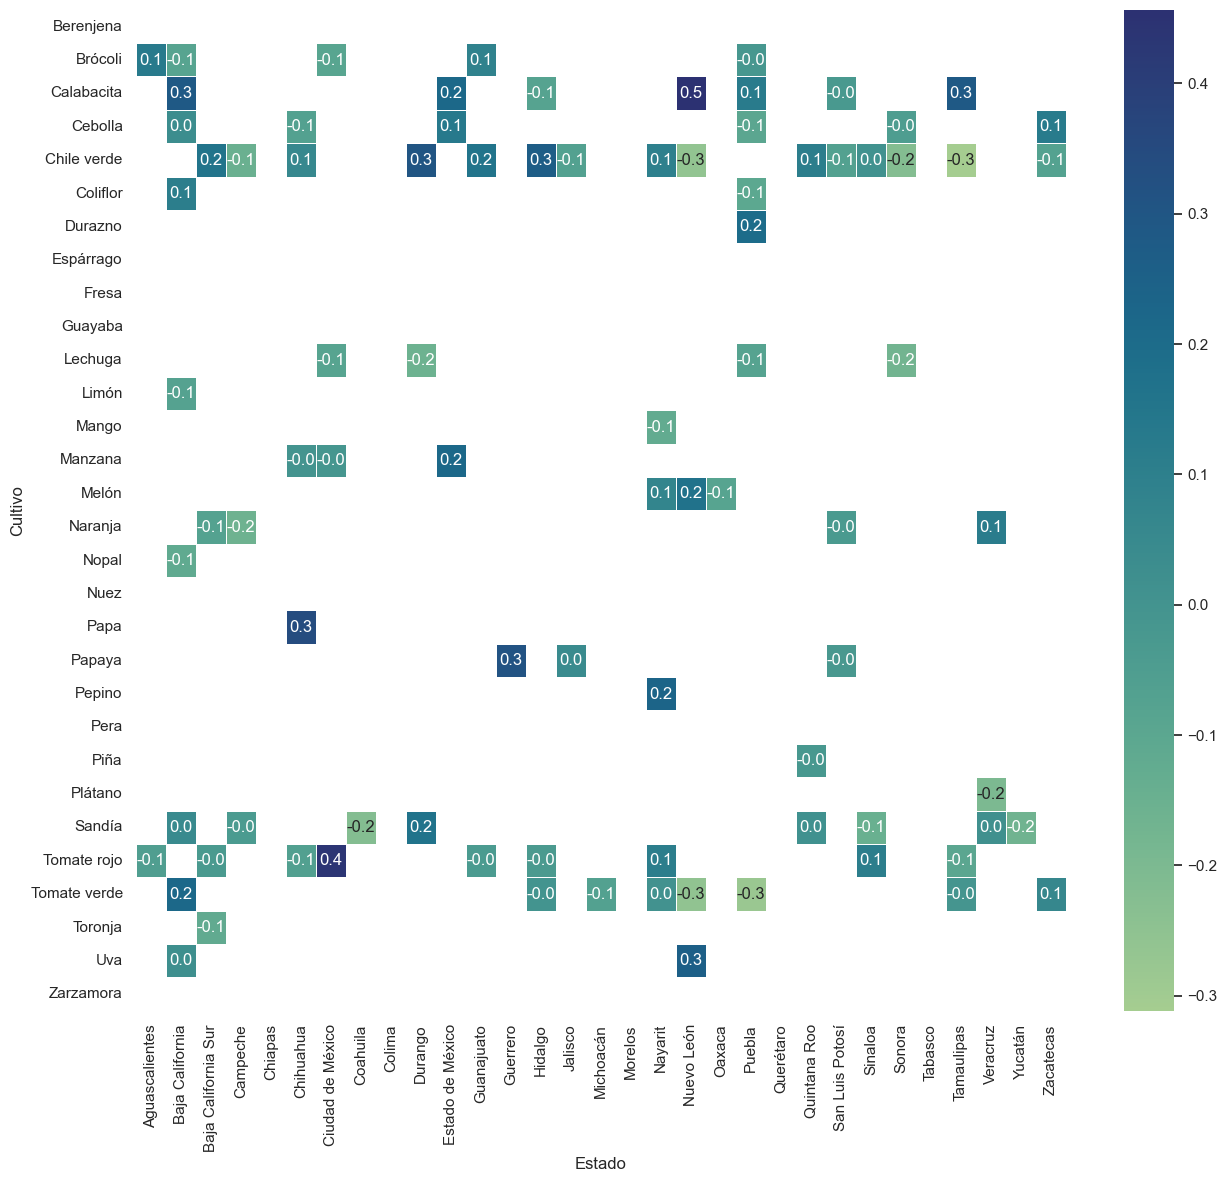

In [94]:
df_corr_siniestrado_precio_pivot = df_corr_siniestrado_precio.pivot(index="Cultivo", columns="Estado", values="Corr_Superficie_Siniestrada_Precio")

f, ax = plt.subplots(figsize=(15, 13))
ax = sns.heatmap(data=df_corr_siniestrado_precio_pivot, annot=True, fmt=".1f", linewidth=.5, cmap="crest")
ax.set(xlabel="Estado", ylabel="Cultivo")

In [95]:
df_corr_siniestrado_precio[~df_corr_siniestrado_precio['Corr_Superficie_Siniestrada_Precio'].isna()]

,Estado,Cultivo,Corr_Superficie_Siniestrada_Precio
0,Aguascalientes,Brócoli,0.128068
13,Aguascalientes,Tomate rojo,-0.053669
17,Baja California,Brócoli,-0.086526
18,Baja California,Calabacita,0.288435
19,Baja California,Cebolla,0.032866
...,...,...,...
514,Veracruz,Sandía,0.017212
532,Yucatán,Sandía,-0.165325
537,Zacatecas,Cebolla,0.125134
538,Zacatecas,Chile verde,-0.071646


In [96]:
df_corr_siniestrado_precio[df_corr_siniestrado_precio['Corr_Superficie_Siniestrada_Precio'] > 0.3]

,Estado,Cultivo,Corr_Superficie_Siniestrada_Precio
88,Chihuahua,Papa,0.342622
104,Ciudad de México,Tomate rojo,0.437118
137,Durango,Chile verde,0.305062
204,Guerrero,Papaya,0.310503
316,Nuevo León,Calabacita,0.456431


In [97]:
df_excedente_agricola[(df_excedente_agricola['Estado']=='Tamaulipas') & (df_excedente_agricola['Cultivo']=='Chile verde')]

,Año,Mes,Cultivo,Estado,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha),Precio,...,Temp_2_Metros_MAX,Temp_2_Metros_MIN,Temp_2_Metros_Pto_Congelación,Temp_2_Metros_Pto_Húmedo,Presión_Superficial,Velocidad_Viento,Humedad_Relativa,Precipitacion,Precipitación,Ivf
61,2020,1,Chile verde,Tamaulipas,446.0,0.00,0.0,0.00,0.000000,37.701727,...,24.722611,12.506444,10.363361,14.013083,96.599632,2.468305,67.499272,0.954141,19.9,132.8
461,2020,2,Chile verde,Tamaulipas,73.0,37.50,0.0,1530.00,40.800000,40.111221,...,26.420826,12.079407,9.556271,14.006047,96.503825,2.878188,62.095870,0.211516,3.1,138.3
863,2020,3,Chile verde,Tamaulipas,544.0,597.50,0.0,10606.80,19.113071,43.582288,...,32.329610,17.711343,14.462491,19.217712,96.308350,3.079272,62.204141,0.482228,12.9,112.4
1277,2020,4,Chile verde,Tamaulipas,0.0,125.00,0.0,5364.12,23.027526,49.837667,...,35.082953,20.764907,16.692411,21.831744,96.000938,2.950264,60.260481,1.732000,35.9,104.1
1714,2020,5,Chile verde,Tamaulipas,92.0,298.00,0.0,18690.00,34.206919,45.455618,...,33.811440,21.519730,19.287502,23.097952,96.053946,3.124141,68.067922,3.623196,120.0,111.7
2477,2020,8,Chile verde,Tamaulipas,460.0,153.00,0.0,779.07,33.024252,40.096757,...,33.368342,22.444854,20.611028,23.971748,96.157817,2.356324,70.689317,1.869062,53.2,204.3
2892,2020,9,Chile verde,Tamaulipas,570.5,0.00,0.0,908.64,33.771488,44.681000,...,31.236364,20.709659,19.315287,22.315922,96.222791,2.392101,73.067798,4.548109,105.9,195.6
3292,2020,10,Chile verde,Tamaulipas,74.0,0.00,0.0,0.00,0.000000,45.511636,...,30.805296,17.622678,15.920863,19.678515,96.327554,2.148035,67.754359,1.168995,17.6,200.3
3602,2020,11,Chile verde,Tamaulipas,0.0,0.00,0.0,0.00,0.000000,44.153034,...,28.565473,15.567326,14.046651,17.584481,96.623225,2.211798,68.925589,0.391163,10.4,258.5
3941,2020,12,Chile verde,Tamaulipas,21.5,0.00,0.0,0.00,0.000000,39.566413,...,24.654239,10.329452,5.590510,11.018162,96.574509,2.509415,55.110968,0.264276,6.5,149.7


In [98]:
df_corr_produccion_precio = df_excedente_agricola.groupby(['Estado','Cultivo'])[['Producción','Precio']]\
    .corr()\
    .unstack()\
    .iloc[:,1]\
    .reset_index()



df_corr_produccion_precio.columns = df_corr_produccion_precio.columns.droplevel(1)
df_corr_produccion_precio.rename(columns={"Producción": "Corr_Producción_Precio"}, inplace=True)
df_corr_produccion_precio

,Estado,Cultivo,Corr_Producción_Precio
0,Aguascalientes,Brócoli,0.016467
1,Aguascalientes,Calabacita,-0.215196
2,Aguascalientes,Cebolla,-0.193931
3,Aguascalientes,Chile verde,-0.041458
4,Aguascalientes,Coliflor,0.198138
...,...,...,...
546,Zacatecas,Pera,NaN
547,Zacatecas,Sandía,-0.206171
548,Zacatecas,Tomate rojo,0.171736
549,Zacatecas,Tomate verde,-0.073402


[Text(0.5, 110.24999999999996, 'Estado'), Text(154.75, 0.5, 'Cultivo')]

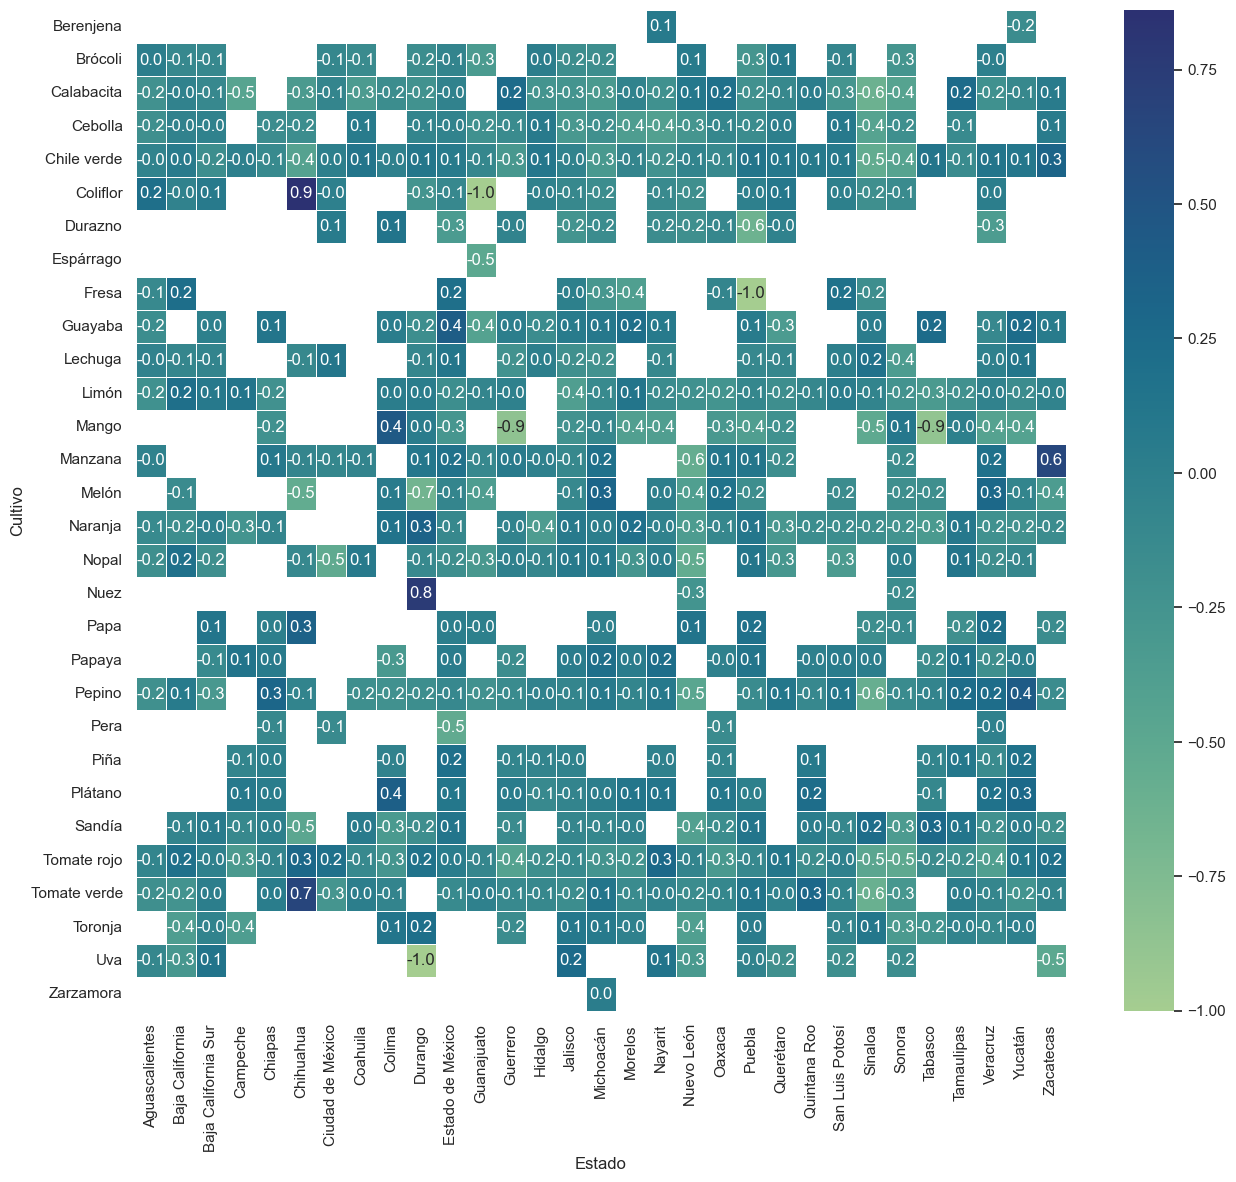

In [99]:
df_corr_produccion_precio_pivot = df_corr_produccion_precio.pivot(index="Cultivo", columns=["Estado"], values="Corr_Producción_Precio")

f, ax = plt.subplots(figsize=(15, 13))
ax = sns.heatmap(data=df_corr_produccion_precio_pivot, annot=True, fmt=".1f", linewidth=.5, cmap="crest")
ax.set(xlabel="Estado", ylabel="Cultivo")

In [100]:
df_corr_produccion_precio[df_corr_produccion_precio['Corr_Producción_Precio'] < -0.7]

,Estado,Cultivo,Corr_Producción_Precio
154,Durango,Uva,-1.000000
182,Guanajuato,Coliflor,-1.000000
200,Guerrero,Mango,-0.852200
361,Puebla,Fresa,-1.000000
469,Tabasco,Mango,-0.875641


In [101]:
df_excedente_agricola[(df_excedente_agricola['Estado']=='Guerrero') & (df_excedente_agricola['Cultivo']=='Mango')]

,Año,Mes,Cultivo,Estado,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha),Precio,...,Temp_2_Metros_MAX,Temp_2_Metros_MIN,Temp_2_Metros_Pto_Congelación,Temp_2_Metros_Pto_Húmedo,Presión_Superficial,Velocidad_Viento,Humedad_Relativa,Precipitacion,Precipitación,Ivf
11011,2022,4,Mango,Guerrero,0.0,3907.31,0.0,66034.96,12.008650,14.000000,...,34.534436,19.001897,11.472115,18.650461,90.047881,1.904877,47.122152,0.470765,11.1,185.6
11494,2022,5,Mango,Guerrero,0.0,2839.33,0.0,52180.92,13.029354,18.190476,...,34.217798,20.001087,13.298459,19.743592,90.049506,1.900777,51.717638,1.588538,52.3,250.2
11984,2022,6,Mango,Guerrero,0.0,4092.38,0.0,65659.38,13.595074,20.530303,...,28.953053,19.566074,18.154918,20.892193,90.098564,1.636284,74.628210,7.227140,229.5,333.3
12480,2022,7,Mango,Guerrero,0.0,2905.53,0.0,58480.92,14.363015,18.809524,...,28.292274,20.085635,19.050299,21.378212,90.232123,1.268152,77.567284,6.206205,217.0,253.5
12975,2022,8,Mango,Guerrero,0.0,860.50,0.0,23280.87,14.790036,21.811594,...,27.480219,19.582405,19.042314,21.071466,90.197113,1.185488,79.933031,6.351119,218.3,165.7
13466,2022,9,Mango,Guerrero,0.0,53.50,0.0,27201.85,15.820513,22.079365,...,26.584370,19.266383,19.364811,20.932449,90.061922,1.418276,83.817288,10.614407,321.3,93.5
13866,2022,10,Mango,Guerrero,0.0,0.00,0.0,3857.75,15.971033,23.460317,...,27.090976,19.038662,18.860876,20.719291,90.166121,1.248746,81.246424,3.032979,104.7,14.5
14210,2022,11,Mango,Guerrero,0.0,82.00,0.0,1512.69,15.978931,25.102564,...,28.366930,18.182095,17.069498,19.830901,90.184461,1.172634,74.139049,0.316086,8.6,1.7


Ahora agrupamos también por Año, para futuro uso en el KPI:

In [102]:
df_corr_produccion_precio_anual = df_excedente_agricola.groupby(['Estado','Cultivo', 'Año'])[['Producción','Precio']]\
    .corr()\
    .unstack()\
    .iloc[:,1]\
    .reset_index()



df_corr_produccion_precio_anual.columns = df_corr_produccion_precio_anual.columns.droplevel(1)
df_corr_produccion_precio_anual.rename(columns={"Producción": "Corr_Producción_Precio"}, inplace=True)
df_corr_produccion_precio_anual

,Estado,Cultivo,Año,Corr_Producción_Precio
0,Aguascalientes,Brócoli,2020,-0.006511
1,Aguascalientes,Brócoli,2021,-0.453055
2,Aguascalientes,Brócoli,2022,-0.310289
3,Aguascalientes,Brócoli,2023,0.545401
4,Aguascalientes,Calabacita,2021,0.350134
...,...,...,...,...
2004,Zacatecas,Tomate verde,2023,0.842413
2005,Zacatecas,Uva,2020,-0.429327
2006,Zacatecas,Uva,2021,-0.390927
2007,Zacatecas,Uva,2022,-0.841378


Guardando en CSV

In [103]:
# Guardar en formato csv
path = "../EDA/data" 
df_corr_produccion_precio_anual.to_csv(os.path.join(path,"df_corr_produccion_precio_anual.csv") , index=False)


### Nota importante

Algo muy importante que hay que mencionar es que, estos datos tienen temporalidad, es decir, cada cultivo tiene sus fechas muy particulares en las que se hace la siembra y en que se cosecha. 

Al tener la información mensual de los cultivos, no se puede esperar que cada mes se realize la siembra, o que cada mes se coseche. Por ello muchos de estos datos aparecen en 0 durante la mayor parte del año.

De ser así, este proyecto quizás podría abordarse con modelos de series de tiempo.